# Analysis of NYC Motor Vehicle Collisions
## Introduction

The NYC Motor Vehicle Collisions dataset contains detailed information about crashes, casualties, and vehicle types across New York City.
In this analysis, I will clean the dataset and explore three main questions:

> 1. Which boroughs have the most crashes?

> 2. At what hours of the day do crashes occur most frequently?

> 3. Which types of vehicles are involved in the highest total casualties (injuries + deaths)?

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://data.cityofnewyork.us/resource/h9gi-nx95.csv?$limit=5000000"  

df = pd.read_csv(url, low_memory=False)

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2021-09-11T00:00:00.000,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26T00:00:00.000,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2023-11-01T00:00:00.000,1:29,BROOKLYN,11230,40.62179,-73.970024,"\n, \n(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,2022-06-29T00:00:00.000,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,2022-09-21T00:00:00.000,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


## Data Cleaning
I started by keeping only relevant columns for my analysis, including borough, crash time, casualties, and vehicle types.  
I also converted all casualty-related columns to numeric types and fill missing values with 0.  
This ensures that calculations, such as totals or sums, will be accurate and avoids errors due to missing or non-numeric values.

In [131]:
# Standardize column names: lowercase with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Keeping only relevant columns
columns_to_keep = [
    'borough','crash_time',
    'number_of_persons_injured','number_of_persons_killed',
    'number_of_pedestrians_injured','number_of_pedestrians_killed',
    'number_of_cyclist_injured','number_of_cyclist_killed',
    'number_of_motorist_injured','number_of_motorist_killed',
    'vehicle_type_code1','vehicle_type_code2','vehicle_type_code_3',
    'vehicle_type_code_4','vehicle_type_code_5'
]

df = df[columns_to_keep].copy()

# Convert to numeric columns
numeric_cols = [
    'number_of_persons_injured','number_of_persons_killed',
    'number_of_pedestrians_injured','number_of_pedestrians_killed',
    'number_of_cyclist_injured','number_of_cyclist_killed',
    'number_of_motorist_injured','number_of_motorist_killed'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

df.head()

,borough,crash_time,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,NaN,2:39,2,0,0,0,0,0,2,0,Sedan,Sedan,NaN,NaN,NaN
1,NaN,11:45,1,0,0,0,0,0,1,0,Sedan,NaN,NaN,NaN,NaN
2,BROOKLYN,1:29,1,0,0,0,0,0,1,0,Moped,Sedan,Sedan,NaN,NaN
3,NaN,6:55,0,0,0,0,0,0,0,0,Sedan,Pick-up Truck,NaN,NaN,NaN
4,NaN,13:21,0,0,0,0,0,0,0,0,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


## Question 1: Which boroughs have the most crashes?

In [132]:
# Replace missing/unknown boroughs with '0' for filtering
df['borough'] = df['borough'].fillna('0')

borough_counts = df[df['borough'] != '0']['borough'].value_counts().reset_index()
borough_counts.columns = ['borough', 'count']

I replaced missing or unknown boroughs with `"0"` so they would not cause errors or disappear without notice.  
Then, I filtered out `"0"` and counted crashes by borough. This gave me a clean distribution across NYC boroughs.

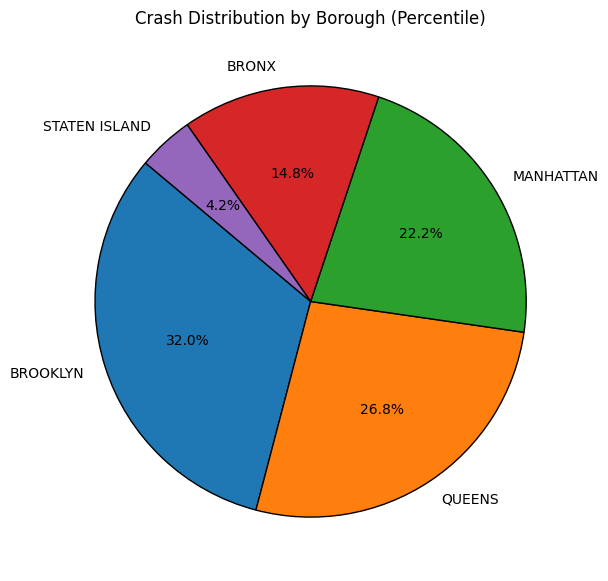

In [133]:
plt.figure(figsize=(7,7))
plt.pie(
    borough_counts['count'],
    labels=borough_counts['borough'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Crash Distribution by Borough (Percentile)")
plt.show()

### Answer 1:
Brooklyn (32%) and Queens (26.8%) have the highest crash counts, followed by Manhattan, Bronx, and Staten Island.

## Question 2: At what hours of the day do crashes occur most frequently?

In [134]:
# Convert crash_time to crash_hour
def extract_hour(time_str):
    try:
        if pd.isna(time_str):
            return 0
        return int(time_str.split(":")[0])
    except:
        return 0

df['crash_hour'] = df['crash_time'].apply(extract_hour)

# Number of Crashes by Hour
hour_counts = df['crash_hour'].value_counts().sort_index().reset_index()
hour_counts.columns = ['hour', 'count']

I created a function to extract the hour from the crash_time column. If the value was missing or invalid, I replaced it with 0. I then applied this function to create a new column called crash_hour that will allow me to analyze crashes by time of day. 
Then I grouped by hour and counted the number of crashes.

I counted crashes per hour and visualized them as a bar chart.

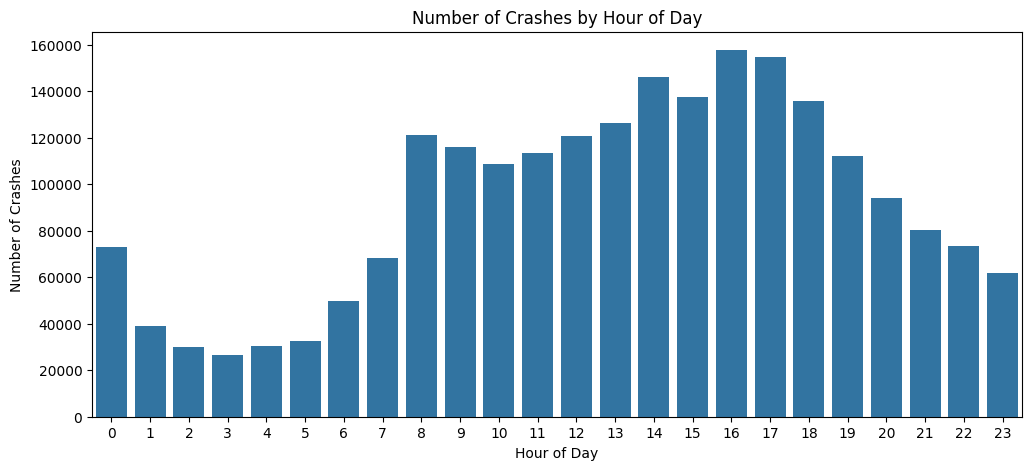

In [135]:
plt.figure(figsize=(12,5))
sns.barplot(x='hour', y='count', data=hour_counts)
plt.title("Number of Crashes by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crashes")
plt.show()

### Answer 2:
Crashes peak during the evening rush hours (4–6 PM), and there is a smaller morning peak around 8 AM.

## Question 3: Which vehicle types are involved in the highest total casualties?

I aggregated all injuries and deaths into a single column and transformed vehicle type columns for analysis. Then I cleaned and unified vehicle type names.

In [137]:
# Aggregate total injuries and deaths into one column
df['total_casualties'] = df[['number_of_persons_injured','number_of_pedestrians_injured',
                             'number_of_cyclist_injured','number_of_motorist_injured',
                             'number_of_persons_killed','number_of_pedestrians_killed',
                             'number_of_cyclist_killed','number_of_motorist_killed']].sum(axis=1)

# Melt vehicle types for easier grouping
vehicle_cols = ['vehicle_type_code1','vehicle_type_code2','vehicle_type_code_3',
                'vehicle_type_code_4','vehicle_type_code_5']
df_vehicles = df.melt(id_vars=['total_casualties'], value_vars=vehicle_cols,
                      var_name='vehicle_slot', value_name='vehicle_type')

# Clean vehicle types
df_vehicles = df_vehicles.dropna(subset=['vehicle_type'])
df_vehicles['vehicle_type'] = df_vehicles['vehicle_type'].astype(str).str.strip().str.upper()

# Replace empty strings or invalid entries with 'UNKNOWN'
df_vehicles['vehicle_type'] = df_vehicles['vehicle_type'].replace(r'[^A-Z0-9/ ]+', 'UNKNOWN', regex=True)
df_vehicles['vehicle_type'] = df_vehicles['vehicle_type'].replace('', 'UNKNOWN')

# Unify similar vehicle types
df_vehicles['vehicle_type'] = df_vehicles['vehicle_type'].replace({
    'STATION WAGON/SPORT UTILITY VEHICLE': 'SUV',
    'VAN FORD': 'VAN',
    'BOX TRUCK': 'BOX TRUCK',
    '4 DR SEDAN': 'SEDAN',
    'BIKE': 'BICYCLE',
    'PICKUNKNOWNUP TRUCK': 'PICK-UP TRUCK'
})

# Summarize total casualties by vehicle type
vehicle_summary = df_vehicles.groupby('vehicle_type')['total_casualties'].sum().reset_index()

# Keep top 10 vehicle types by total casualties
vehicle_summary = vehicle_summary.sort_values(by='total_casualties', ascending=False).head(10)

print(vehicle_summary)

                       vehicle_type  total_casualties
1542                          SEDAN            934251
1659                            SUV            692549
1312              PASSENGER VEHICLE            407054
1613  SPORT UTILITY / STATION WAGON            175264
183                         BICYCLE            127091
1685                           TAXI             97513
1338                  PICK-UP TRUCK             50826
247                             BUS             43080
1144                     MOTORCYCLE             36447
1948                            VAN             30866


I calculated total casualties by summing all injury and death columns. I then reshaped the vehicle type columns, cleaned the text, standardized similar types, and grouped them by total casualties. Finally, I sorted the results and kept the top 10 vehicle types with the highest casualties.

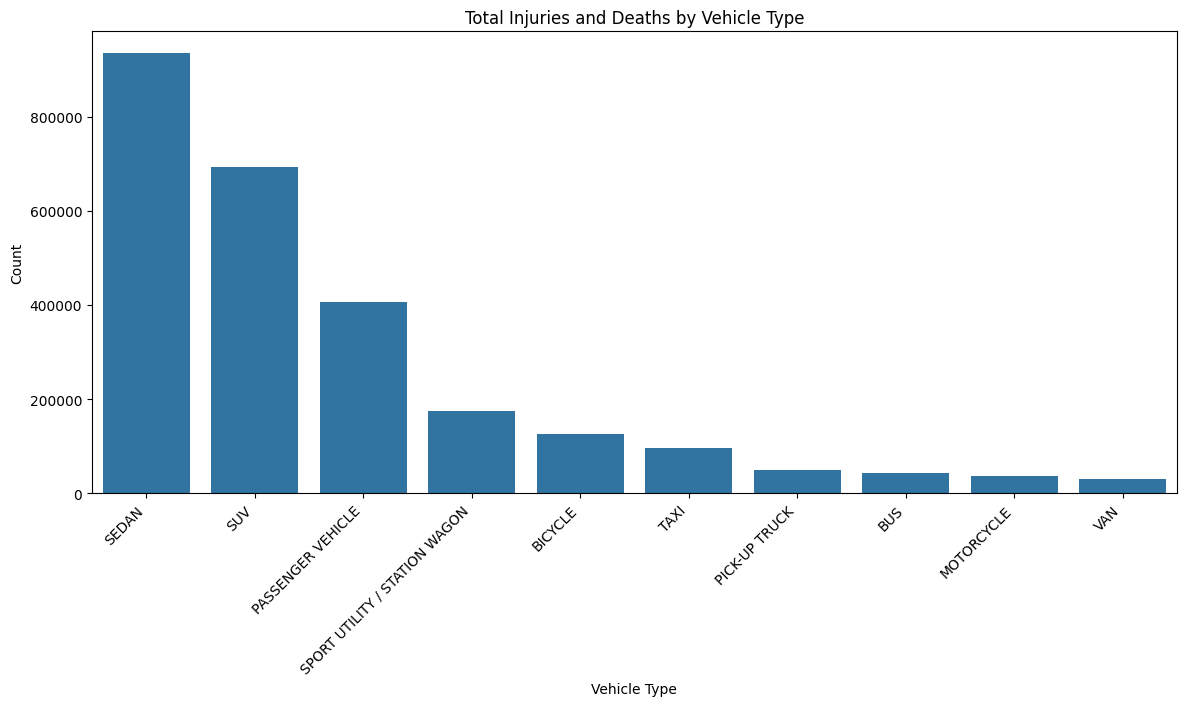

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(
    x='vehicle_type', 
    y='total_casualties', 
    data=vehicle_summary
)
plt.xticks(rotation=45, ha='right')
plt.title("Total Injuries and Deaths by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()

### Answer 3:
The results show that sedans and SUVs cause the most casualties, followed by passenger vehicles and bicycles. Taxis, buses, motorcycles, and vans also contribute significantly but to a lesser degree.